<a href="https://colab.research.google.com/github/DaniloRiver/Pythons17/blob/main/Modelo_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Jose Danilo Rivera 202101607###

##Modelo de Imagenes con Tensor Flow##

In [1]:
# Librerias TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias Adicionales
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
#Importación el set de datos de moda de MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Extrayendo en una lista los nombres de cada clase
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Explorando set de datos##


In [6]:
#Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:
train_images.shape

(60000, 28, 28)

In [7]:
#Etiquetas en el set de entrenamiento:
len(train_labels)

60000

In [8]:
#Cada etiqueta es un integro entre 0 y 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:
test_images.shape

(10000, 28, 28)

In [11]:
#el set de pruebas contiene 10,000 etiquetas de imagen:
len(test_labels)

10000

##Pre-procesamiento del set de datos##

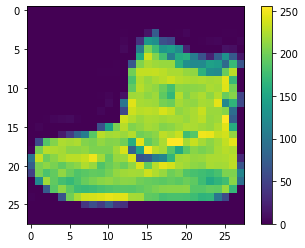

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal
train_images = train_images / 255.0
test_images = test_images / 255.0

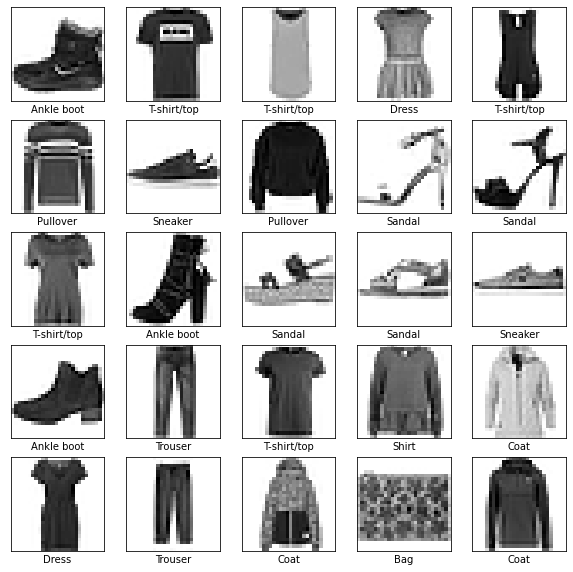

In [15]:
# primeras 25 imagenes de el training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##Construir el Modelo##

In [16]:
#Configurar las Capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
#compilando el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Entrenar el Modelo##

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4971 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3345 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

##Evaluar Exactitud##

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3385 - accuracy: 0.8805 - 504ms/epoch - 2ms/step

Test accuracy: 0.8805000185966492


##Hacer predicciones##

In [20]:
predictions = model.predict(test_images)

##modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba)##

In [22]:
predictions[0]

array([3.9334189e-11, 3.9153442e-10, 4.9654292e-10, 1.1671469e-11,
       3.1217931e-10, 1.7521940e-03, 1.1932176e-10, 1.5724790e-03,
       8.0696125e-09, 9.9667537e-01], dtype=float32)

##revisar cual tiene el nivel mas alto de confianza:##

In [24]:
np.argmax(predictions[0])

9

##Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta##

In [23]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

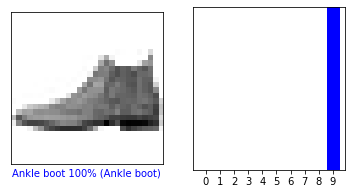

In [34]:
# Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

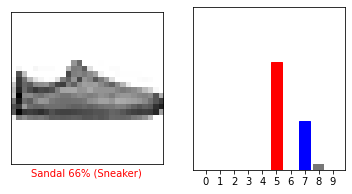

In [27]:
#Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

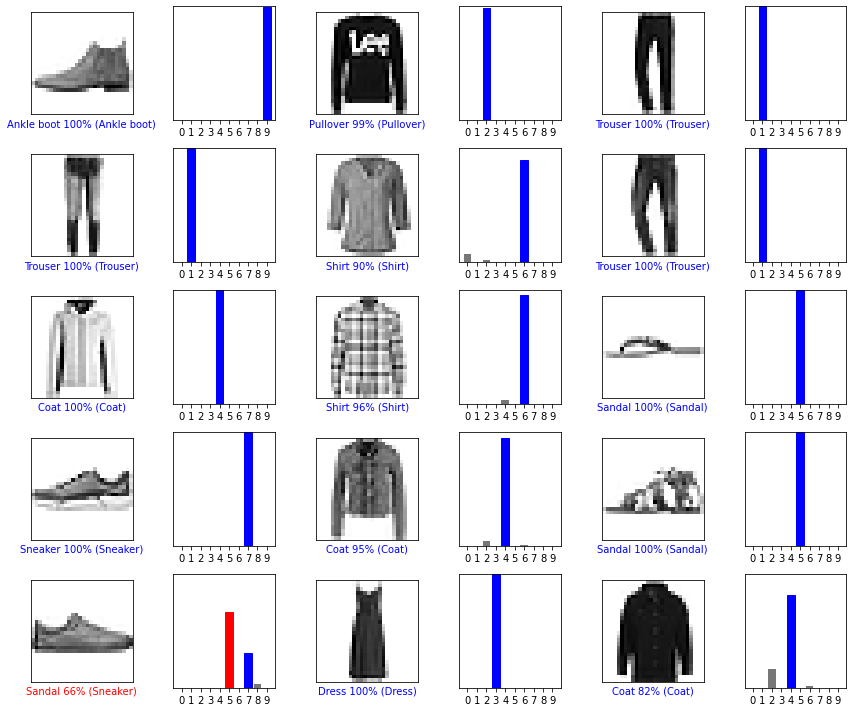

In [28]:
# Traza las primeras imágenes de prueba X, sus etiquetas predichas y las etiquetas verdaderas.
# Predicciones correctas de color en azul y predicciones incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Tome una imagen del conjunto de datos de prueba.
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# Agregue la imagen a un lote donde sea el único miembro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
#Ahora prediga la etiqueta correcta para esta imagen:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4879528e-04 3.2952361e-09 9.8806548e-01 3.2555073e-07 7.6446203e-03
  5.3752305e-11 4.1406788e-03 3.1648881e-14 3.0619343e-09 2.4774103e-11]]


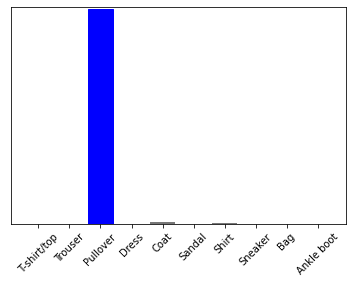

In [32]:
#Tome la prediccion para nuestra unica imagen dentro del batch o bloque:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
#el modelo predice una etiqueta de 2.
np.argmax(predictions_single[0])

2